In [1]:
import pandas as pd

In [2]:
review = pd.read_csv("all_reviews.csv")

In [3]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             19345 non-null  object 
 1   City               19345 non-null  object 
 2   Place Type         19345 non-null  object 
 3   Place Category     19345 non-null  object 
 4   Place Name         19345 non-null  object 
 5   Rating             19345 non-null  float64
 6   Review Text        19143 non-null  object 
 7   Reviewer Language  19345 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.2+ MB


In [4]:
review.columns

Index(['Region', 'City', 'Place Type', 'Place Category', 'Place Name',
       'Rating', 'Review Text', 'Reviewer Language'],
      dtype='object')

In [5]:
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not done already
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/engineersh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/engineersh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Step 1.1: Drop rows with missing Review Text
review = review.dropna(subset=['Review Text'])

review.shape

(19143, 8)

In [7]:
# Step 1.2: Remove duplicate rows (based on Review Text + Place Name)
review = review.drop_duplicates(subset=['Review Text', 'Place Name'])
review.shape

(17762, 8)

In [8]:
# Step 1.1: Drop rows with missing Review Text
review = review.dropna(subset=['Review Text'])
review.shape

(17762, 8)

In [9]:
# Step 1.2: Remove duplicate rows (based on Review Text + Place Name)
review = review.drop_duplicates(subset=['Review Text', 'Place Name'])
review.shape

(17762, 8)

In [10]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/engineersh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# make sure NLTK resources are downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Step 1.3: Define the cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = word_tokenize(text)  # tokenize
    stop_words = set(stopwords.words('english'))  # define stopwords
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return ' '.join(tokens)  # rejoin cleaned words

# Apply to your DataFrame
review['Cleaned Review'] = review['Review Text'].apply(clean_text)

# Check the result
print(review['Cleaned Review'][0])


[nltk_data] Downloading package punkt to /home/engineersh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/engineersh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


location best good chains outlets available within km distance rooms big amenities served try room service comment checkin checkout smooth cleanliness could improved


In [12]:
# Step 1.4: Apply cleaning
review['Cleaned Review'] = review['Review Text'].apply(clean_text)


In [13]:
#checking one cleaned review
review['Cleaned Review'][0]

'location best good chains outlets available within km distance rooms big amenities served try room service comment checkin checkout smooth cleanliness could improved'

## ✅ Filter to Keep Only English Reviews


In [14]:
# Define allowed English language tags
allowed_langs = ['en', 'en-us']

# Filter to keep only rows with 'en' or 'en-US' (case-insensitive)
review = review[review['Reviewer Language'].str.lower().isin(allowed_langs)]

# Reset index
review = review.reset_index(drop=True)

# Check result
print(f"Remaining rows after keeping only English reviews: {len(review)}")
print("Languages kept:")
print(review['Reviewer Language'].value_counts())


Remaining rows after keeping only English reviews: 17355
Languages kept:
Reviewer Language
en       15585
en-US     1770
Name: count, dtype: int64


## ✅ Step 3: Sentiment Analysis (Labeling Reviews, dummy model)


In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the lexicon
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Apply sentiment scoring
def get_sentiment_scores(text):
    return vader.polarity_scores(text)

# Create new sentiment columns
sentiment_scores = review['Cleaned Review'].apply(get_sentiment_scores).apply(pd.Series)

# Merge back to review DataFrame
review = pd.concat([review, sentiment_scores], axis=1)

# Label sentiment based on compound score
def label_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

review['Sentiment Label'] = review['compound'].apply(label_sentiment)

# Preview results
print(review[['Cleaned Review', 'compound', 'Sentiment Label']].sample(5))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/engineersh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          Cleaned Review  compound  \
6786   clean well maintained lots life guards ensurin...    0.9325   
14729  one best hotel like hotel like location hotel ...    0.8481   
5136   excellent comfortable clean stuff helpful poli...    0.9403   
14542             excellent arabic coffee tea hot drinks    0.5719   
5318             tucked away green good trees nice quite    0.6908   

      Sentiment Label  
6786         positive  
14729        positive  
5136         positive  
14542        positive  
5318         positive  


<Axes: >

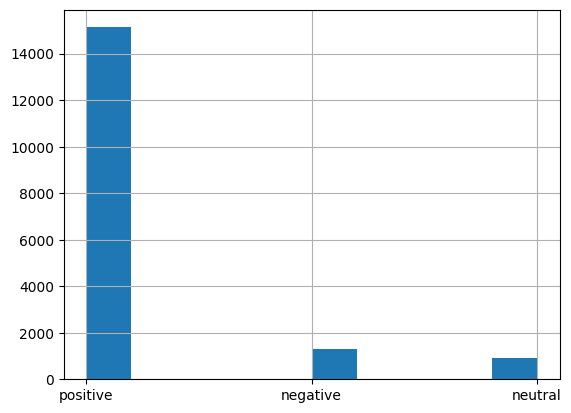

In [16]:
review["Sentiment Label"].hist()

In [17]:
review.head()

,Region,City,Place Type,Place Category,Place Name,Rating,Review Text,Reviewer Language,Cleaned Review,neg,neu,pos,compound,Sentiment Label
0,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,"Location is best, all good chains outlets avai...",en,location best good chains outlets available wi...,0.000,0.662,0.338,0.8807,positive
1,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,Rooms are good enough to accommodate a family ...,en,rooms good enough accommodate family kids neat...,0.000,0.395,0.605,0.8658,positive
2,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,"Just a reasonable cheap hotel, the price is th...",en,reasonable cheap hotel price main success factor,0.000,0.619,0.381,0.5719,positive
3,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,We had a bad experience in reception. They did...,en,bad experience reception give rooms per bookin...,0.234,0.766,0.000,-0.7506,negative
4,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,One of the best and budget friendly hotels in ...,en,one best budget friendly hotels hail good swim...,0.000,0.214,0.786,0.9545,positive


In [18]:
review['Cleaned Review'].head()

0    location best good chains outlets available wi...
1    rooms good enough accommodate family kids neat...
2     reasonable cheap hotel price main success factor
3    bad experience reception give rooms per bookin...
4    one best budget friendly hotels hail good swim...
Name: Cleaned Review, dtype: object

In [19]:
review['Cleaned Review']

0        location best good chains outlets available wi...
1        rooms good enough accommodate family kids neat...
2         reasonable cheap hotel price main success factor
3        bad experience reception give rooms per bookin...
4        one best budget friendly hotels hail good swim...
                               ...                        
17350    mashallah place beautiful employees respectful...
17351       crasy price kids games high mantioned price sr
17352                  great place much fun friends family
17353    good collections games leasure kids cleaniness...
17354    maintainanceit closed another one near radison...
Name: Cleaned Review, Length: 17355, dtype: object

In [20]:
review['Place Type']

0                 hotel
1                 hotel
2                 hotel
3                 hotel
4                 hotel
              ...      
17350    amusement_park
17351    amusement_park
17352    amusement_park
17353    amusement_park
17354    amusement_park
Name: Place Type, Length: 17355, dtype: object

In [21]:
# #import pandas as pd

# #data = {
#     'Place Type': ['hotel', 'hotel', 'restaurant', 'restaurant', 'cafe', 'cafe', 'museum', 'museum', 'park', 'park',
#                    'hotel', 'restaurant', 'cafe', 'museum', 'park'],
#     'Cleaned Review': [
#         'Great location and nice rooms.',
#         'Friendly staff and clean facilities.',
#         'Delicious food but slow service.',
#         'Wonderful ambiance and great desserts.',
#         'Cozy place with good coffee.',
#         'Nice environment and good pastries.',
#         'Interesting exhibits and friendly staff.',
#         'Amazing history and well-preserved artifacts.',
#         'Lovely park with clean areas for kids.',
#         'Peaceful place with lots of greenery.',
#         'Comfortable bed and good breakfast.',
#         'Fast service and excellent quality.',
#         'Nice quiet cafe with great ambiance.',
#         'Interesting museum with interactive exhibits.',
#         'Beautiful park with scenic walking paths.'
#     ]
# }

# #df = pd.DataFrame(data)

# #print(df)


In [28]:
review.head()

,Region,City,Place Type,Place Category,Place Name,Rating,Review Text,Reviewer Language,Cleaned Review,neg,neu,pos,compound,Sentiment Label
0,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,"Location is best, all good chains outlets avai...",en,location best good chains outlets available wi...,0.000,0.662,0.338,0.8807,positive
1,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,Rooms are good enough to accommodate a family ...,en,rooms good enough accommodate family kids neat...,0.000,0.395,0.605,0.8658,positive
2,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,"Just a reasonable cheap hotel, the price is th...",en,reasonable cheap hotel price main success factor,0.000,0.619,0.381,0.5719,positive
3,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,We had a bad experience in reception. They did...,en,bad experience reception give rooms per bookin...,0.234,0.766,0.000,-0.7506,negative
4,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,One of the best and budget friendly hotels in ...,en,one best budget friendly hotels hail good swim...,0.000,0.214,0.786,0.9545,positive


In [ ]:
df = review.copy()
df_pos = df[df['Rating'] >= 3.5]
df_neg = df[df['Rating'] < 3.5]



Positive Reviews:
  Place Type                                     Cleaned Review
0      hotel  location best good chains outlets available wi...
1      hotel  rooms good enough accommodate family kids neat...
2      hotel   reasonable cheap hotel price main success factor
3      hotel  bad experience reception give rooms per bookin...
4      hotel  one best budget friendly hotels hail good swim...

Negative Reviews:
   Place Type                                     Cleaned Review
25      hotel  rooms really good issue water shower really do...
26      hotel  arrived hotel good receptionist hotel rooms cl...
27      hotel  great hotel nice view easy outside services st...
28      hotel  absolutely disgusting found hair bed even touc...
29      hotel  bad management good sarvice good behaviour pm ...


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

place_types = df['Place Type'].unique()

for place in place_types:
    print(f"\n--- Topics for {place} ---")

    place_df = df[df['Place Type'] == place]

    texts = place_df['Cleaned Review'].dropna().values.astype('U')

    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(texts)

    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(dtm)

    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(lda.components_):
        print(f"\nTopic #{idx + 1}:")
        print([words[i] for i in topic.argsort()[-10:]])



--- Topics for hotel ---

Topic #1:
['stay', 'place', 'location', 'service', 'rooms', 'staff', 'nice', 'clean', 'hotel', 'good']

Topic #2:
['beautiful', 'cleanliness', 'excellent', 'place', 'reception', 'bathroom', 'hotel', 'room', 'clean', 'god']

Topic #3:
['time', 'reception', 'rooms', 'experience', 'staff', 'stay', 'bad', 'service', 'room', 'hotel']

Topic #4:
['amazing', 'comfortable', 'highly', 'recommend', 'great', 'staff', 'experience', 'service', 'stay', 'hotel']

Topic #5:
['parking', 'breakfast', 'nice', 'location', 'place', 'rooms', 'clean', 'hotel', 'good', 'room']

--- Topics for restaurant ---

Topic #1:
['recommend', 'dining', 'highly', 'staff', 'delicious', 'great', 'restaurant', 'service', 'food', 'experience']

Topic #2:
['cleanliness', 'place', 'dishes', 'fish', 'excellent', 'quality', 'service', 'experience', 'restaurant', 'food']

Topic #3:
['ordered', 'restaurant', 'delicious', 'shawarma', 'food', 'good', 'rice', 'best', 'taste', 'chicken']

Topic #4:
['taste',

In [25]:
df.head()

,Region,City,Place Type,Place Category,Place Name,Rating,Review Text,Reviewer Language,Cleaned Review,neg,neu,pos,compound,Sentiment Label
0,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,"Location is best, all good chains outlets avai...",en,location best good chains outlets available wi...,0.000,0.662,0.338,0.8807,positive
1,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,Rooms are good enough to accommodate a family ...,en,rooms good enough accommodate family kids neat...,0.000,0.395,0.605,0.8658,positive
2,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,"Just a reasonable cheap hotel, the price is th...",en,reasonable cheap hotel price main success factor,0.000,0.619,0.381,0.5719,positive
3,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,We had a bad experience in reception. They did...,en,bad experience reception give rooms per bookin...,0.234,0.766,0.000,-0.7506,negative
4,North,Hail,hotel,lodging,Tamyoz Hotel Apartment,3.7,One of the best and budget friendly hotels in ...,en,one best budget friendly hotels hail good swim...,0.000,0.214,0.786,0.9545,positive


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

place_types = df['Place Type'].unique()

for place in place_types:
    print(f"\n--- Topics for {place} ---")

    place_df = df[df['Place Type'] == place]

    texts = place_df['Cleaned Review'].dropna().values.astype('U')

    vectorizer = CountVectorizer(max_df=0.85, min_df=1, stop_words='english')
    dtm = vectorizer.fit_transform(texts)

    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(dtm)

    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(lda.components_):
        print(f"\nTopic #{idx + 1}:")
        print([words[i] for i in topic.argsort()[-10:]])



--- Topics for hotel ---

Topic #1:
['like', 'bathroom', 'clean', 'service', 'bad', 'good', 'water', 'rooms', 'hotel', 'room']

Topic #2:
['location', 'rooms', 'great', 'nice', 'service', 'stay', 'staff', 'clean', 'good', 'hotel']

Topic #3:
['booking', 'check', 'reception', 'experience', 'time', 'service', 'stay', 'staff', 'room', 'hotel']

Topic #4:
['comfortable', 'making', 'recommend', 'exceptional', 'highly', 'truly', 'service', 'hotel', 'experience', 'stay']

Topic #5:
['cleanliness', 'treatment', 'hotel', 'reception', 'thank', 'place', 'excellent', 'god', 'beautiful', 'clean']

--- Topics for restaurant ---

Topic #1:
['delicious', 'staff', 'time', 'order', 'place', 'restaurant', 'service', 'nice', 'food', 'good']

Topic #2:
['flies', 'money', 'time', 'worst', 'table', 'menu', 'order', 'food', 'service', 'bad']

Topic #3:
['delicious', 'staff', 'best', 'great', 'chicken', 'service', 'place', 'restaurant', 'good', 'food']

Topic #4:
['highly', 'atmosphere', 'staff', 'great', 'de

In [27]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk

nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    return vader.polarity_scores(text)

df['Sentiment Scores'] = df['Cleaned Review'].apply(get_sentiment_scores)
sentiment_scores = pd.json_normalize(df['Sentiment Scores'])

for col in sentiment_scores.columns:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

df = pd.concat([df, sentiment_scores], axis=1)

def label_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment Label'] = df['compound'].apply(lambda x: label_sentiment(x) if isinstance(x, (int, float)) else 'neutral')

hotel_topic_labels = {
    0: "Room Comfort & Service",
    1: "Location & Cleanliness",
    2: "Reception & Booking",
    3: "Exceptional Experience",
    4: "Hotel Reception & Cleanliness"
}

restaurant_topic_labels = {
    0: "Delicious Food & Service",
    1: "Poor Service & Price",
    2: "Good Ambiance & Food",
    3: "Slow Service & Unpleasant Experience",
    4: "Great Restaurant Vibe"
}

cafe_topic_labels = {
    0: "Chill Atmosphere & Coffee",
    1: "Crowded & Slow Service",
    2: "Cozy & Relaxing",
    3: "Busy & Noisy",
    4: "Affordable & Tasty"
}

park_topic_labels = {
    0: "Peaceful Family Time",
    1: "Crowded & Dirty",
    2: "Relaxing Greenery",
    3: "Maintenance Issues",
    4: "Good for Kids"
}

museum_topic_labels = {
    0: "Educational Experience",
    1: "Disappointing Visit",
    2: "Interesting Exhibits",
    3: "Small & Overpriced",
    4: "Historical Value"
}

def map_topic_labels(row):
    if row['Place Type'] == 'hotel':
        return hotel_topic_labels.get(row['Topic'], f"Topic {row['Topic']}")
    elif row['Place Type'] == 'restaurant':
        return restaurant_topic_labels.get(row['Topic'], f"Topic {row['Topic']}")
    elif row['Place Type'] == 'cafe':
        return cafe_topic_labels.get(row['Topic'], f"Topic {row['Topic']}")
    elif row['Place Type'] == 'amusement_park':
        return park_topic_labels.get(row['Topic'], f"Topic {row['Topic']}")
    elif row['Place Type'] == 'museum':
        return museum_topic_labels.get(row['Topic'], f"Topic {row['Topic']}")
    else:
        return f"Topic {row['Topic']}"

place_types = df['Place Type'].unique()
lda_results = []

for place in place_types:
    place_df = df[df['Place Type'] == place]
    texts = place_df['Cleaned Review'].dropna().values.astype('U')
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(texts)
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(dtm)
    place_df = place_df.copy()
    place_df['Topic'] = [i % 5 for i in range(len(place_df))]
    place_df['Topic Label'] = place_df.apply(map_topic_labels, axis=1)
    lda_results.append(place_df[['Place Type', 'Cleaned Review', 'Topic', 'Topic Label', 'Sentiment Label']])

lda_combined_df = pd.concat(lda_results)
print(lda_combined_df.head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/engineersh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  Place Type                                     Cleaned Review  Topic  \
0      hotel  location best good chains outlets available wi...      0   
1      hotel  rooms good enough accommodate family kids neat...      1   
2      hotel   reasonable cheap hotel price main success factor      2   
3      hotel  bad experience reception give rooms per bookin...      3   
4      hotel  one best budget friendly hotels hail good swim...      4   

                     Topic Label Sentiment Label  
0         Room Comfort & Service        positive  
1         Location & Cleanliness        positive  
2            Reception & Booking        positive  
3         Exceptional Experience        negative  
4  Hotel Reception & Cleanliness        positive  


The distribution of sentiment by location type

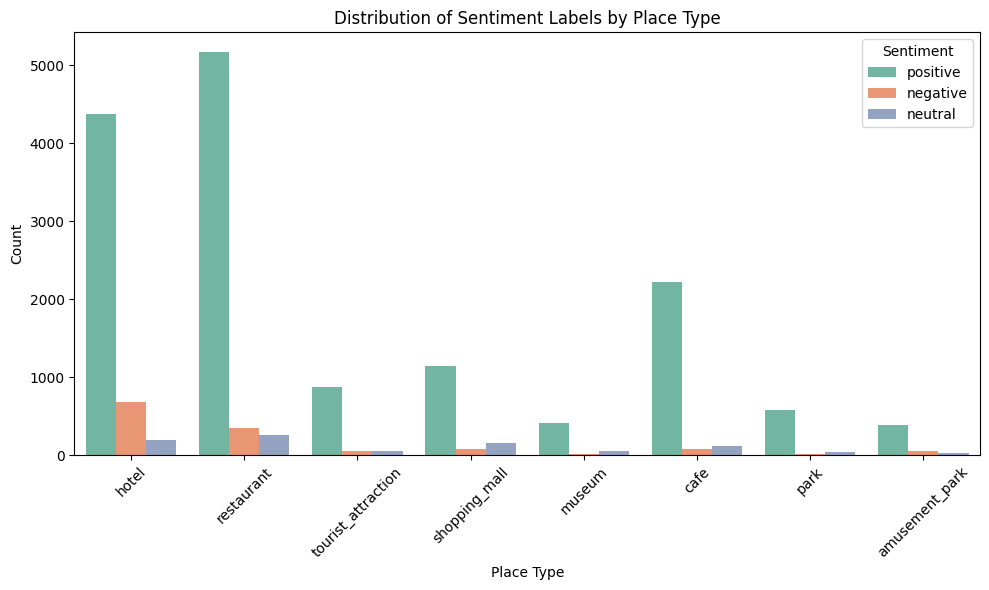

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=lda_combined_df, x='Place Type', hue='Sentiment Label', palette='Set2')
plt.title('Distribution of Sentiment Labels by Place Type')
plt.xlabel('Place Type')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most popular topics in each type of place

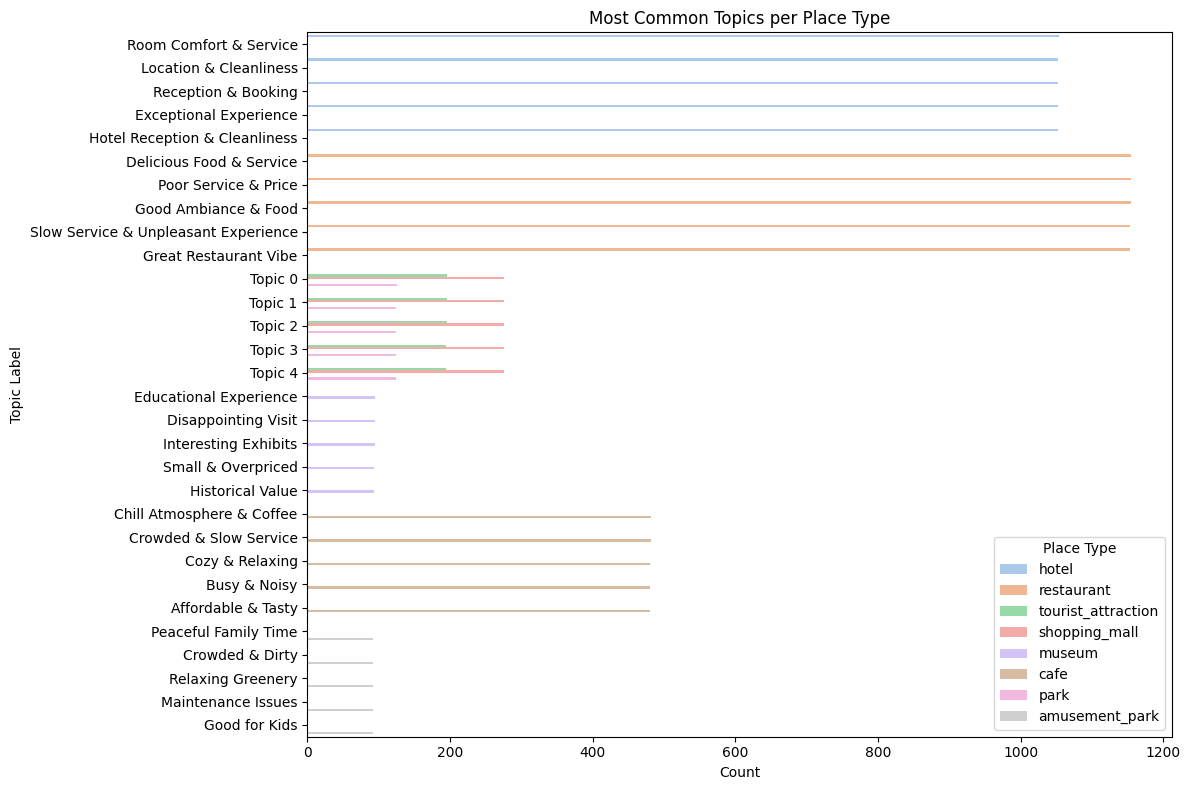

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=lda_combined_df, y='Topic Label', hue='Place Type', palette='pastel')
plt.title('Most Common Topics per Place Type')
plt.xlabel('Count')
plt.ylabel('Topic Label')
plt.legend(title='Place Type')
plt.tight_layout()
plt.show()

Sentiment analysis for each topic

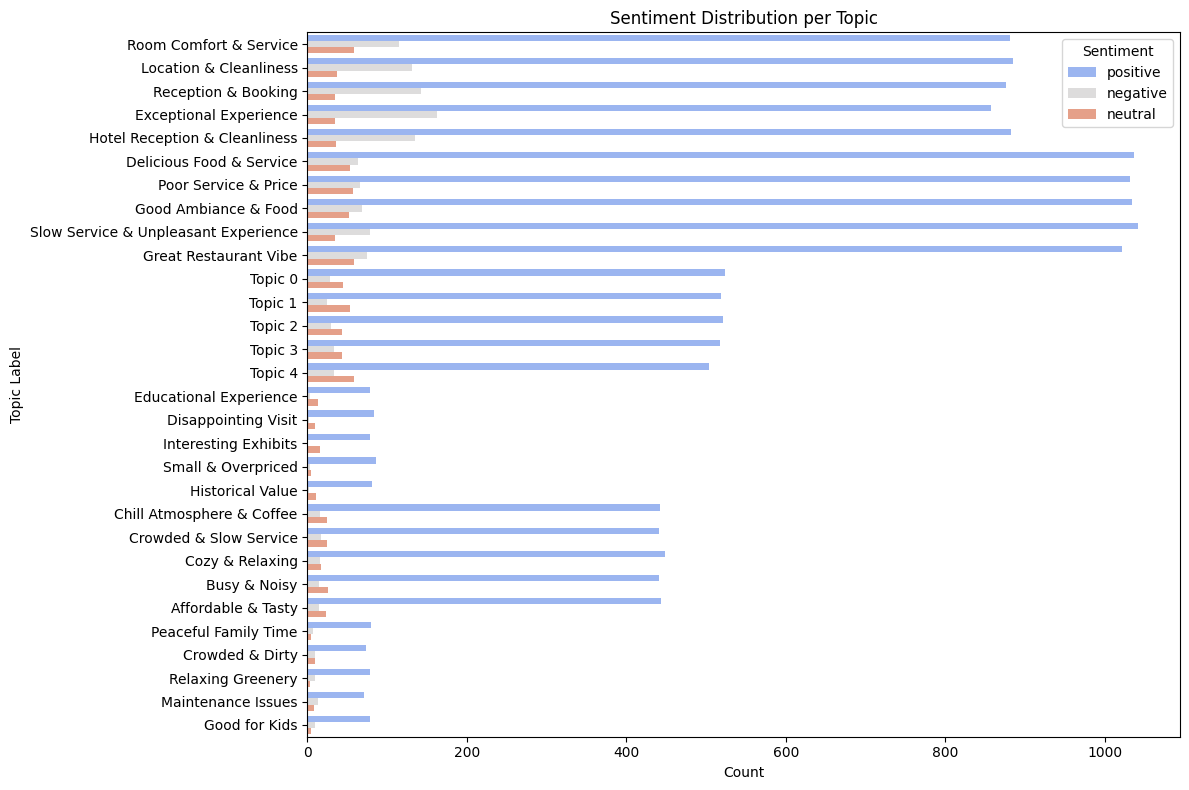

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=lda_combined_df, y='Topic Label', hue='Sentiment Label', palette='coolwarm')
plt.title('Sentiment Distribution per Topic')
plt.xlabel('Count')
plt.ylabel('Topic Label')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [ ]:
pip install wordcloud

  Using cached wordcloud-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511 kB)
Note: you may need to restart the kernel to use updated packages.


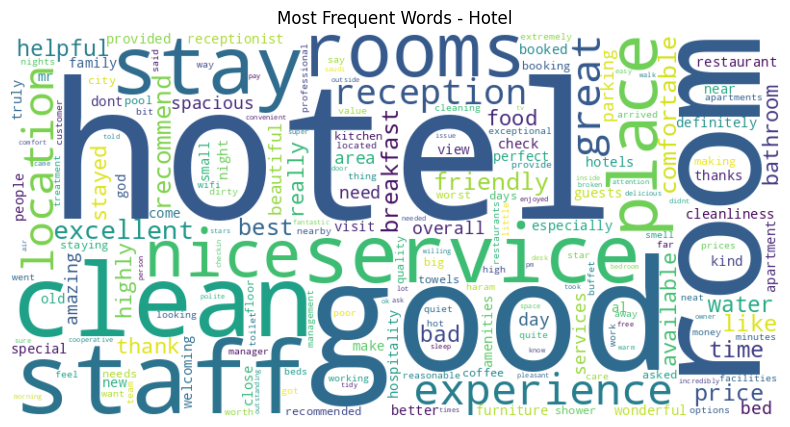

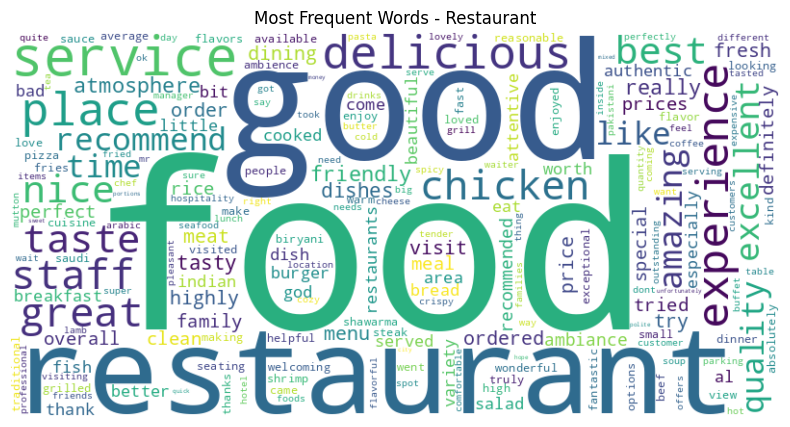

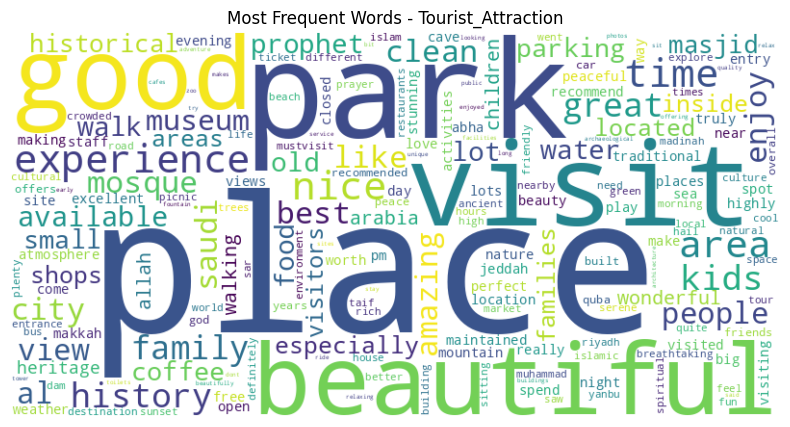

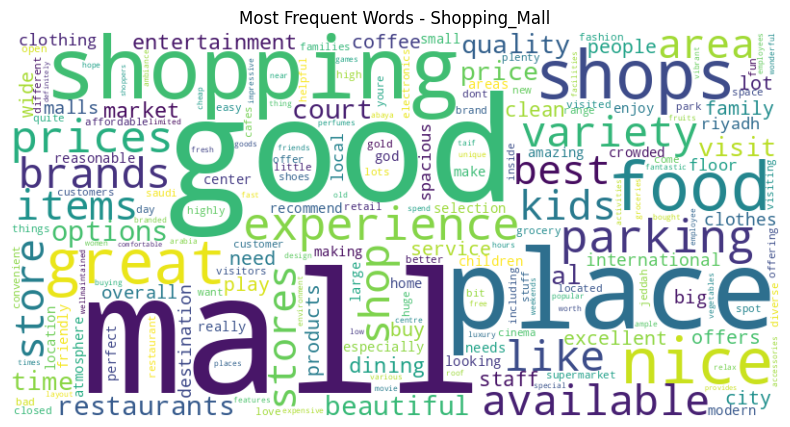

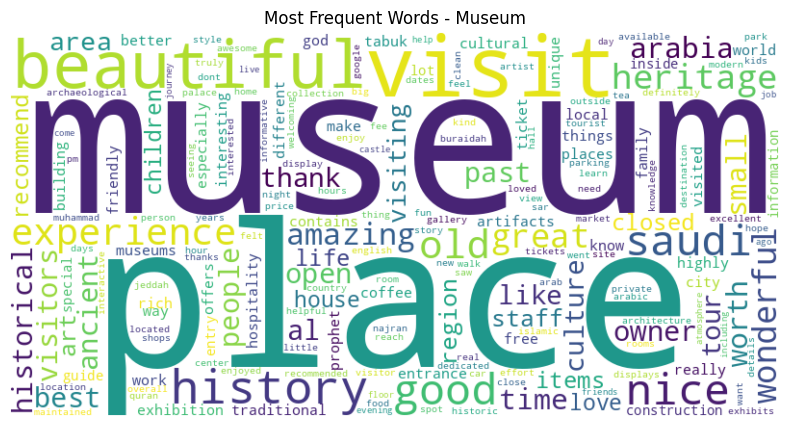

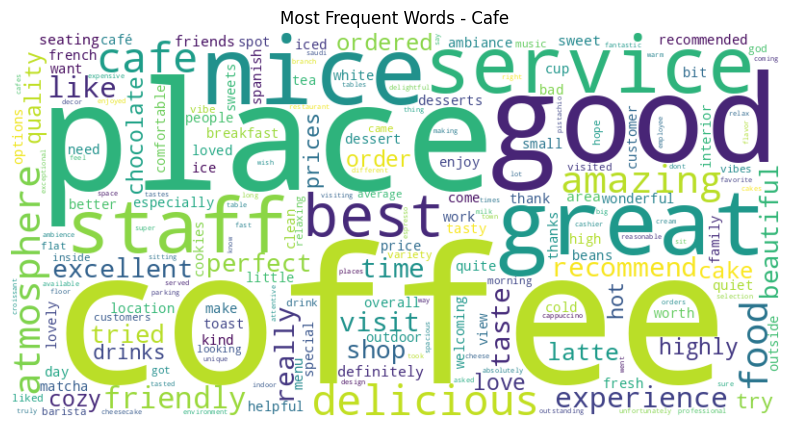

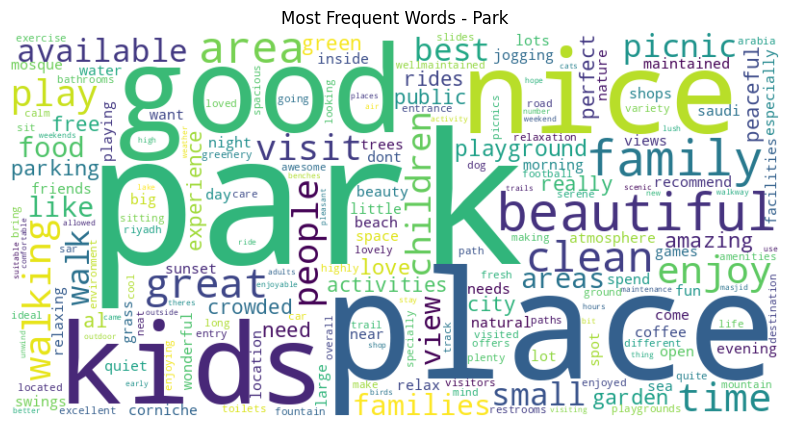

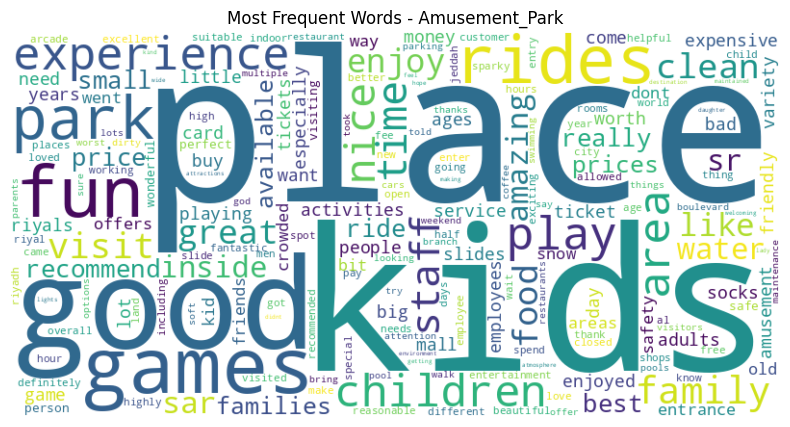

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import matplotlib.pyplot as plt

for place in lda_combined_df['Place Type'].unique():
    text = " ".join(lda_combined_df[lda_combined_df['Place Type'] == place]['Cleaned Review'])
    vectorizer = CountVectorizer(stop_words='english')
    word_freq = vectorizer.fit_transform([text])
    words = vectorizer.get_feature_names_out()
    freqs = word_freq.toarray().flatten()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(words, freqs)))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Frequent Words - {place.title()}')
    plt.show()


Sentiment ratio (percentage) for each place type

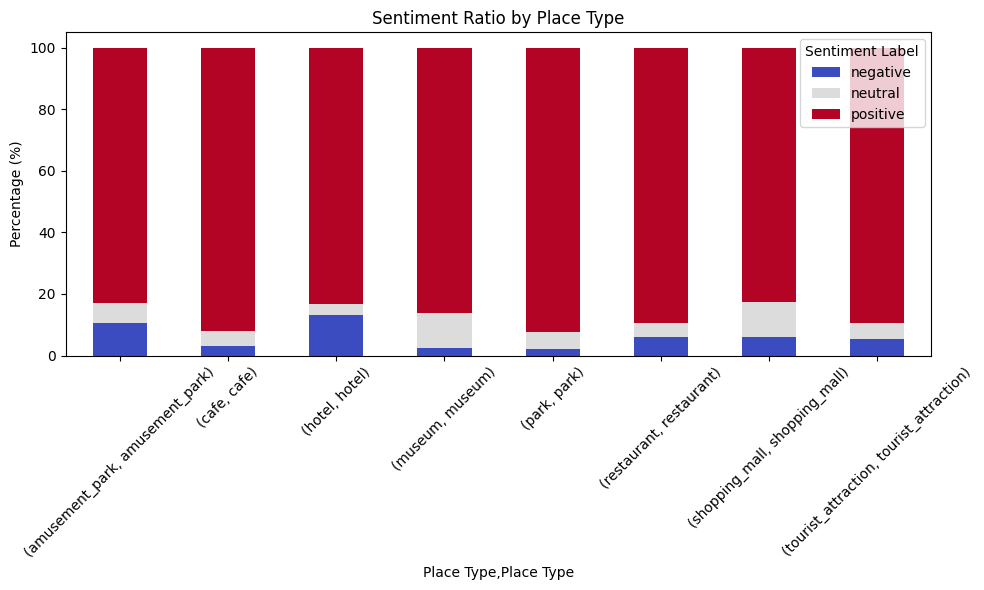

In [ ]:
sentiment_ratio = lda_combined_df.groupby(['Place Type', 'Sentiment Label']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()
sentiment_ratio.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Sentiment Ratio by Place Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Topic analysis by emotion type

/tmp/ipykernel_59301/1415530499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=lda_combined_df, x='Sentiment Label', y='Review Length', palette='coolwarm')


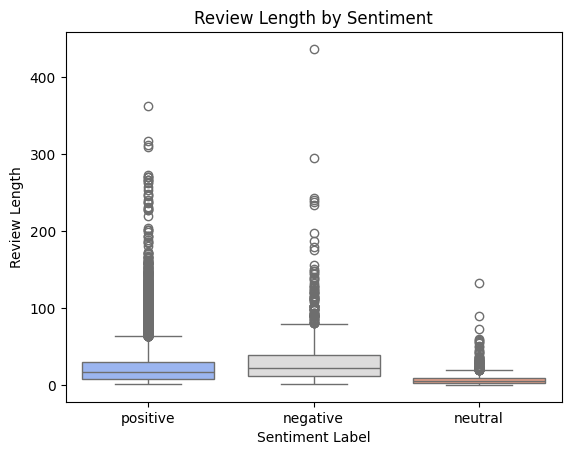

In [ ]:
lda_combined_df['Review Length'] = lda_combined_df['Cleaned Review'].apply(lambda x: len(x.split()))
sns.boxplot(data=lda_combined_df, x='Sentiment Label', y='Review Length', palette='coolwarm')
plt.title('Review Length by Sentiment')
plt.show()
